<a href="https://colab.research.google.com/github/jrmaza/machine-learning/blob/main/23710_electiva_01_smiles_y_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMILES y descriptores moleculares con RDKit**



---



## **SMILES: Simplfied Molecular Input-Line Entry Specification**
## **EILMS: Especificación de Introducción Lineal Molecular Simplificada**

Es una notación utilizada en Química que permite representar las estructuras moleculares en una forma de lenguaje de máquina. Este tipo

![Representacón SMILES](https://d2cbg94ubxgsnp.cloudfront.net/Pictures/1024x536/7/1/6/516716_smiles_54413.png)

**Figura 1**. Representación SMILES de una molécula orgánica

La notación SMILES fue desarrollada por [Dave Weininger](https://www.chemistryworld.com/opinion/weiningers-smiles/4014639.article) en Pomona College, Claremont, Canada en varias publicaciones comenzando desde 1897.

### Reglas o sintáxis básicas de SMILES
Se deben seguir cinco reglas básicas para una correcta notación SMILES de una molécula o sustancia química. A continuación, se describirán las cinco reglas generales para una notación consistente.

#### **Regla 1: Átomos y Enlaces**
La notación SMILES soporta todos los elementos en la tabla periódica. Un átomo es representado usando su símbolo respectivo. Si el símbolo de un átomo contiene dos caracteres, la segunda letra debe escribirse en minúsculas.

En compuestos orgánicos los hidrógenos son omitidos por simpleza, que contengan átomos como nitrógeno, oxígeno y carbono, los símbolos en <font color='red'>**MAYÚSCULAS**</font> representan átomos <font color='red'>**NO-AROMÁTICOS**</font>, mientras que si su conjugación es <font color='blue'>**aromática**</font>, deben ser representados en <font color='blue'>**minúsculas**</font>.


El tipo de enlaces se representan de la siguiente forma:

| Tipo de enlace      | Reperesentación SMILES |
| ----------- | ----------- |
| Enlace sencillo σ      | `-`       |
| Enlace doble π      | `=`       |
| Enlace triple       | `#`       |
| Enlace aromático       | `*`       |
| Estructura desconectada       | `.`       |

Los enlaces sencillos, se consideran por defecto y generalmente (a menos que sea necesario especificarlos) se omiten. Por ejemplo, `CC` corresponderá que los átomos están conectados por un enlace sencillo y que ninguno de los dos es aromático, así en lenguaje de máquina se interpretará esta estructura como el etano.

#### **Regla 2: Cadenas simples**

Se puede representar la estructura molecular combinando símbolos atómicos y notación de enlaces.

Algunos ejemplos de moléculas son:

| SMILES      | Fórmula Molecular | Nombre |
| ----------- | ----------- | ----------- |
| `CC`    | CH3CH3 |	Etano             |
| `C=C`	  | CH2CH2 |	Eteno             |
| `CBr`	  | CH3Br  |	Bromometano       |
| `C#N 	  | C=N 	 | Ácido cinanhídrico |
| `Na.Cl` | NaCl   | Cloruro de sodio   |

En adición, se puede especificar de manera explícita (si se desea) los átomos de hidrógeno. Sin embargo, si un átomo de hidrógeno es ingresado en la notación, el intérprete asumirá que se han ingresado todos los átomos de hidrógeno de la molécula.
Por ejemplo el eteno:
`HC(H)=C(H)(H)`

#### **Regla 3: Ramificaciones**

Una ramificación se especifica mediante el uso de paréntesis `()`, indicando en el medio el símbolo o símbolos de los átomos que se encuentran ramificados de la cadena principal. El paréntesis son ubicados directamente después de el símbolo del átomo al cuál está conectada la ramificación.

| SMILES      | Nombre |
| ----------- | ----------- |
| `CC(O)C` 	          |  2-Propanol |
| `CC(=O)C` 	        |  2-Propanona |
| `CC(CC)C` 	        |  2-Methilbutano |
| `CC(C)CC(=O)` 	    |  2-Methlbutanal |
| `c1c(N(=O)=O)cccc1` | 	Nitrobenceno |
| `CC(C)(C)CC`  	    |  2,2-Dimetilbutano |



#### **Regla 4: Anillos**

Se identifican estructuras cíclicas o anillos, indicando átomos de apertura y cerradura. Por ejemplo en `C1CCCCC1` el primer carbono tiene el número 1, el cual está conectado con un enlace simple con el último carbono, que también tiene el número 1. La estructura resultante es el ciclohexano. Estructuras con más de un anillo, se pueden representar utilizando diferentes números para cada anillo. Si un enlace doble o aromático hace parte del átomo abridor o cerrante del anillo, el símbolo del enlace se indica antes del número que indica antes del símbolo. Algunos ejemplos ilustrativos son:

| SMILES      | Nombre |
 | ----------- | ----------- |      
 | `C=1CCCCC1` 	| Ciclohexeno |
 | `C*1*C*C*C*C*C1` 	| Benceno |
 | `c1ccccc1` 	| Benceno |
 | `C1OC1CC` 	| Etiloxirano |
 | `c1cc2ccccc2cc1` 	| Nafthaleno |


#### **Regla 5: Átomos cargados**

Las cargas en los átomos deben ser especificadas utilizando los corchetes: `{}` indicando dentro la carga del átomo, por ejemplo:

 | SMILES      | Nombre |
 | ----------- | ----------- |      
 | `CCC(=O)O{-1}` 	| Propanoato |
 | `c1ccccn{+1}1CC(=O)O` 	| 1-Carboxilmetil piridinium |




---



## **RDKit**

![](https://www.rdkit.org/Images/logo.png)

[RDKit](https://www.rdkit.org/) es un conjunto de herramientas informáticas utilizado en química y diseño de fármacos para investigar y desarrollar nuevos medicamentos de manera más eficiente.
Dentro de los principales usos de RDKit se pueden resaltar:
- **Simulación y modelado molecula**r: RDKit permite a los científicos simular cómo interactúan las moléculas a nivel atómico, lo que es crucial para entender cómo funcionan los medicamentos en el cuerpo y cómo pueden diseñarse para ser más efectivos.

- **Búsqueda y análisis de sustancias químicas**: Ayuda a los investigadores a buscar y analizar diferentes sustancias químicas para encontrar aquellas que podrían ser útiles como medicamentos. Puedes pensar en esto como buscar ingredientes específicos para tu receta.

- **Diseño de nuevas moléculas**: Los científicos pueden usar RDKit para crear y modificar moléculas, diseñando así nuevas estructuras químicas que puedan tener propiedades medicinales deseables.

- **Predicción de propiedades y toxicidad**: RDKit también puede ayudar a predecir cómo se comportarán las moléculas en el cuerpo y si podrían causar efectos secundarios no deseados.

### **Instalación en Google Colaboratory**
El utilitario instalador de `python-pip` es utilizado para instalar RDKit de manera concreta en el entorno. Por favor `ejecutar` la siguiente celda de código

In [ ]:
#@ Instalar RDKit
#!cat  /etc/lsb-release
!pip install rdkit-pypi -qqq

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.2 LTS"


In [ ]:
#@ Importar módulos
import rdkit
from rdkit import Chem
from IPython import display
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

In [ ]:
benzoico = Chem.MolFromSmiles('c1ccccc1C(=O)O')

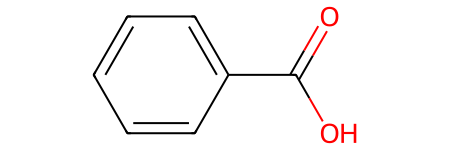

In [ ]:
benzoico

In [ ]:
################# Intente con las siguientes moléculas
## 'OCCc1ccn2cnccc12'
## 'C1CC1Oc1cc2ccncn2c1'
## 'CNC(=O)c1nccc2cccn12'

### **Regla de Lipinski**

La Regla de Lipinski, también conocida como la Regla de los Cinco o de Pfizer, es un conjunto de criterios desarrollado por el químico Christopher Lipinski en 1997 como una guía general para evaluar la calidad o potencial de una molécula en el proceso de diseño de fármacos. Esta regla se utiliza para identificar candidatos a fármacos que tienen una mayor probabilidad de ser absorbidos y distribuidos eficazmente en el cuerpo humano.

La Regla de Lipinski se basa en cuatro criterios principales:

- **Peso Molecular (PM)**: El peso molecular de la molécula no debe ser superior a 500 daltons (Da). Las moléculas con un PM menor a 500 Da tienden a tener una mejor absorción y distribución en el cuerpo.

- **LogP (Coeficiente de Partición octanol-agua)**: El valor de LogP, que mide la lipofilia o la afinidad de la molécula por las grasas, no debe ser superior a 5. Un valor de LogP inferior a 5 sugiere que la molécula tiene una mejor capacidad para atravesar las membranas celulares.

- **Número de Donadores de Hidrógeno (HBD)**: La molécula no debe tener más de 5 grupos donadores de hidrógeno. Los grupos donadores de hidrógeno pueden influir en la interacción de la molécula con las proteínas y afectar su capacidad para llegar a su objetivo en el cuerpo.

- **Número de Aceptores de Hidrógeno (HBA)**: La molécula no debe tener más de 10 grupos aceptores de hidrógeno. Los grupos aceptores de hidrógeno pueden influir en la capacidad de la molécula para formar enlaces con otras moléculas en el cuerpo.

Si una molécula cumple con estos cuatro criterios, se considera que tiene una mayor probabilidad de ser un buen candidato para el desarrollo de un fármaco oral efectivo. Sin embargo, es importante tener en cuenta que la Regla de Lipinski es una guía general y no una regla estricta; muchas moléculas que no cumplen todos estos criterios aún pueden ser desarrolladas como medicamentos exitosos. Por lo tanto, se utiliza como una herramienta inicial en la selección de compuestos potenciales para el diseño de fármacos y debe combinarse con una evaluación más detallada y específica de las propiedades y objetivos de la molécula en cuestión.

In [ ]:
mol = Chem.MolFromSmiles('CC(=O)Nc1ccc(O)cc1')  # e.g. Paracetamol

# Ro5 descriptors

MW = Descriptors.MolWt(mol) #peso molecular
HBA = Descriptors.NOCount(mol) #aceptores de puentes de hidrógeno
HBD = Descriptors.NHOHCount(mol) #donadores de puentes de hidrógeno
LogP = Descriptors.MolLogP(mol) #coeficiente de partición octano-agua
conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5] #regla de Lipinski
pass_ro5 = conditions.count(True) >= 3
print(pass_ro5)

True


### Otros descriptores disponibles en `.Descriptors`

- **Polar Surface Area (`MolPSA`)**: Mide el área de la superficie polar en la molécula, puede ayudar a predecir la capacidad de una molécula para atravezar membranas biológicas.

- **Topological Polar Surface Area (`TPSA`)**: Calcula la superficie topológica porlar en una molécula, está ampliamente relacionado con la habilidad de un compuesto para formar enlaces de hidrógeno.

- **Rotatable Bonds (`NumRotatableBonds`)**: Cuenta el número de enlaces rotables en la molécula, lo cual puede afectar su flexibilidad y conformación.

- **Number of Rings (`NumRings`)**: Enumera el número de anillos en una molécula.

- **Number of Aromatic Rings (`NumAromaticRings`)**: Número de anillos aromáticos.

- **Fractional Partial Charges (`FpCharge`)**: Calcula la fracción o cargas parciales de los átomos en la molécula.

# **Projecto de primer corte**

A partir del nombre de los siguientes fármacos conocidos, realice el cálculo de los descriptores moleculares vistos hasta ahora.

Discuta sobre las implicaciones de los valores de los descriptores sobre su potencial farmacológico,

- Aspirin (Acetylsalicylic Acid)
- Caffeine
- Ibuprofen
- Paracetamol (Acetaminophen)
- Penicillin
- Ciprofloxacin
- Ranitidine
- Loratadine
- Simvastatin
- Omeprazole
- Diazepam
- Sertraline
- Metformin
- Warfarin
- Atorvastatin
- Morphine
- Furosemide
- Albuterol
- Fluoxetine
- Amlodipine
- Levothyroxine
- Gabapentin
- Metoprolol
- Clopidogrel
- Risperidone

Acceda al archivo SDF de la cafeina del repositorio https://www.molinstincts.com/sdf-mol-file/caffeine-sdf-CT1001987571.html

In [ ]:
!wget https://static.molinstincts.com/sdf_3d/caffeine-3D-structure-CT1001987571.sdf # descargar el archivo
!mv caffeine-3D-structure-CT1001987571.sdf caffeine.sdf # renombrar el archivo
!cat caffeine.sdf # mostrar el archivo

In [ ]:
sdf_file_path = '/content/caffeine.sdf' # asignar la ruta del archivo
sdf_supplier = Chem.SDMolSupplier(sdf_file_path) # utilizar SDMolSupplier para cargar el archivo
mols = [] # crear un arreglo vacío
# Iterar sobre el archivo y almacenar las moléculas en él
for molecula in sdf_supplier:
    if molecula is not None:
        mols.append(molecula)

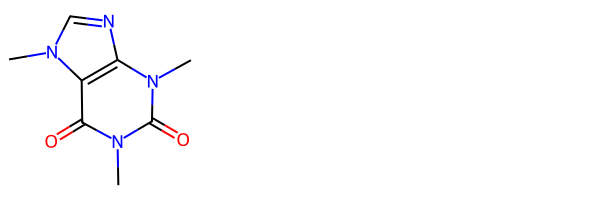

In [ ]:
Draw.MolsToGridImage(mols)